In [1]:
library(readxl)

In [2]:
energy <- read_excel("energy.xlsx",  na=  "NA",  col_names = TRUE)
attach(energy)

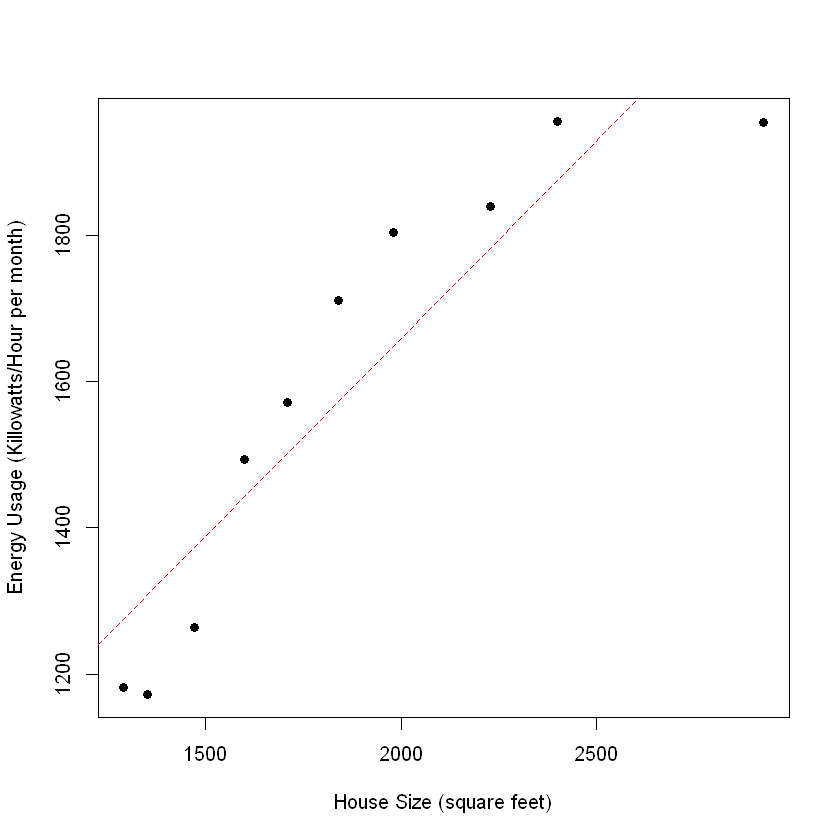

In [3]:
plot(Size, Usage, pch = 16,  xlab = "House Size (square feet)",  ylab = "Energy Usage (Killowatts/Hour per month)")
abline(lm(Usage ~ Size), lty= 2,  col = "red")

In [4]:
min(Size)
max(Size)

[1] 1290

[1] 2930

In [5]:
# a. Sales = B0 + B1(Income) + B2(Income)^2 + E

In [6]:
fastfood <- read_excel("FastFood.xlsx", na="NA", col_names = TRUE)
attach(fastfood)

In [7]:
head(fastfood)

Neighborhood,Revenue,Income,IncomeSqd
1,1128,23.5,552.25
2,1005,17.6,309.76
3,1212,26.3,691.69
4,893,16.5,272.25
5,1073,22.3,497.29
6,1179,26.1,681.21


In [8]:
max(Income)
min(Income)

[1] 33.6

[1] 15.6

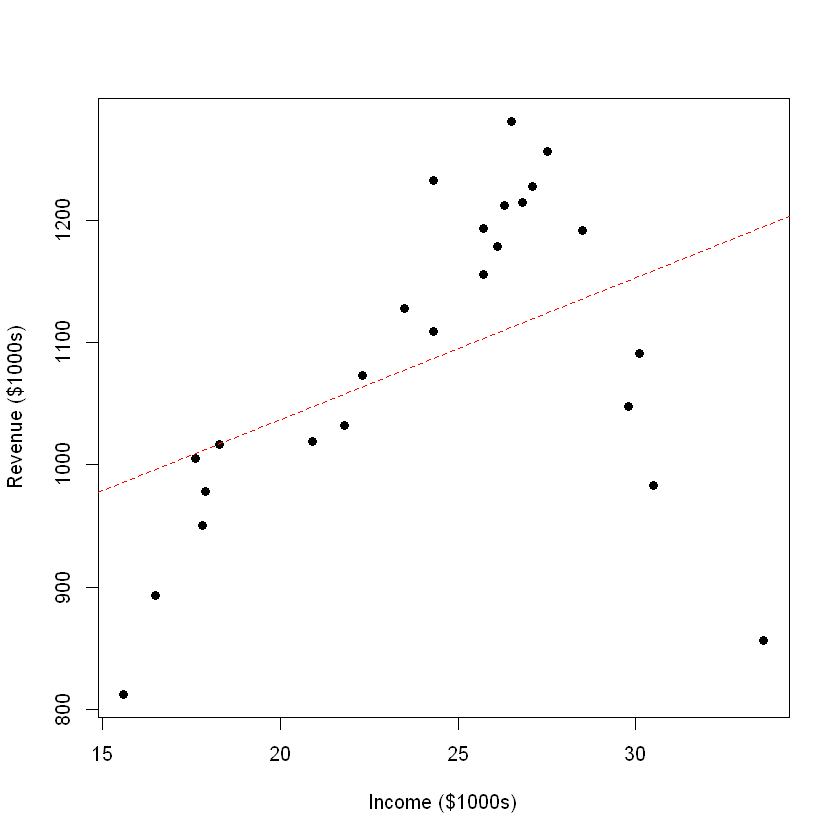

In [9]:
plot(Income, Revenue, pch = 16 ,  xlab = "Income ($1000s)",  ylab = "Revenue ($1000s)")
abline(lm(Revenue ~ Income), lty = 2,  col="red")

In [10]:
linefit <- lm(Revenue ~ Income)
summary(linefit)


Call:
lm(formula = Revenue ~ Income)

Residuals:
    Min      1Q  Median      3Q     Max 
-338.86  -61.15    9.53   90.00  168.70 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  804.181    123.624   6.505 1.23e-06 ***
Income        11.627      5.012   2.320   0.0296 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 119.6 on 23 degrees of freedom
Multiple R-squared:  0.1896,	Adjusted R-squared:  0.1544 
F-statistic: 5.382 on 1 and 23 DF,  p-value: 0.02957


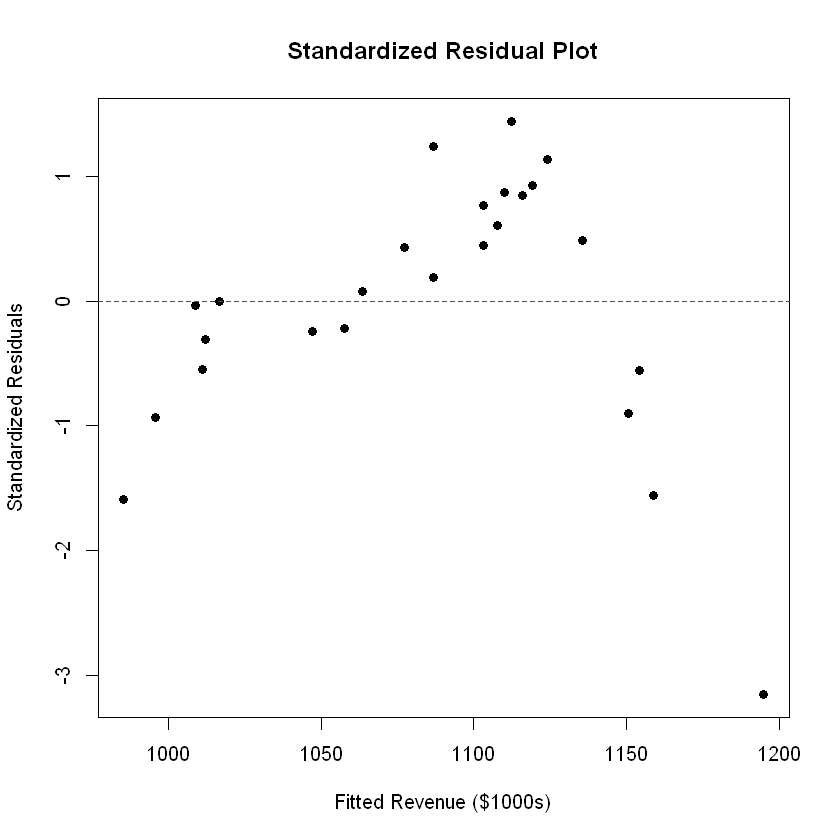

In [11]:
linefit.stres <- rstandard(linefit)
plot(linefit$fitted.values, linefit.stres, pch = 16 ,  main = "Standardized Residual Plot", 
     xlab = "Fitted Revenue ($1000s)",  ylab = "Standardized Residuals")
abline(0,0, lty=2,  col= "red")

In [12]:
linefit2 <- lm(Revenue ~ Income + IncomeSqd)
summary(linefit2)


Call:
lm(formula = Revenue ~ Income + IncomeSqd)

Residuals:
     Min       1Q   Median       3Q      Max 
-105.452  -44.967    8.613   41.906  104.164 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1454.521    279.993  -5.195 3.29e-05 ***
Income        209.815     24.084   8.712 1.39e-08 ***
IncomeSqd      -4.170      0.504  -8.275 3.36e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60.31 on 22 degrees of freedom
Multiple R-squared:  0.8029,	Adjusted R-squared:  0.785 
F-statistic: 44.82 on 2 and 22 DF,  p-value: 1.74e-08


In [13]:
# at 0 income, it is out of range of our values - since our min value is 15600 
# ^B1 is not interpretable because ^B2 has direct collinearity 
# ^B2 is not interpretable
# c. ^B0 = -1454.521
#    ^B1 = 209.815

# B.
# H0: B2 = 0: not curvillinear
# Ha: B2 =/= 0: curvillinear
# p-value = 3.36e-08

# 40% chance of getting this sample result if there was no curvillinear relationship

# C.
# ^B0 = -1454.521
# ^B1 = 209.815
# ^B2 = -4.170

# p-value: 1.74e-08 is testing if x is a useful predictor of y
# if B1 and B2 = 0 

# 3.36e-08 is if there a curvillinear relationship between Income and Revenue

# H0: B1 = 0
# Ba: B1 =/= 0
# p-value = .98

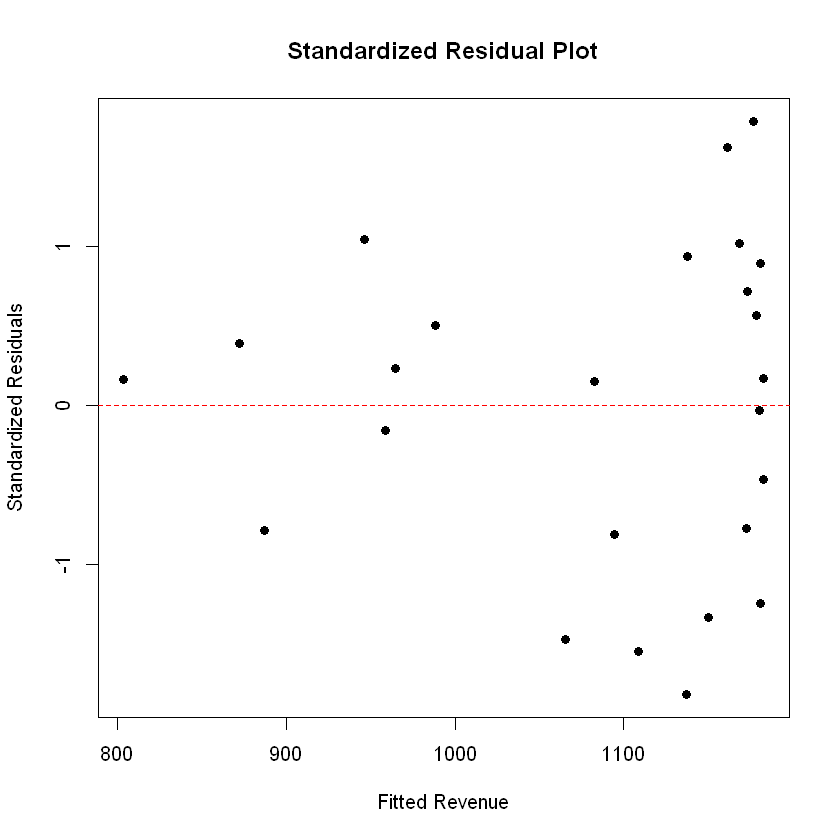

In [14]:
linefit2.stres <- rstandard(linefit2) 
plot(linefit2$fitted.values, linefit2.stres, pch = 16, main = "Standardized Residual Plot", 
     xlab = "Fitted Revenue", ylab = "Standardized Residuals") 
abline(0,0, lty=2, col="red")

In [15]:
# H0:  β2= 0 ; no curvilinear relationship
# Ha:  β2≠ 0 ; curvilinear relationship

# Note: Values of β1 and β2 are not interpretable.  
# Why?  Collinearity!

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

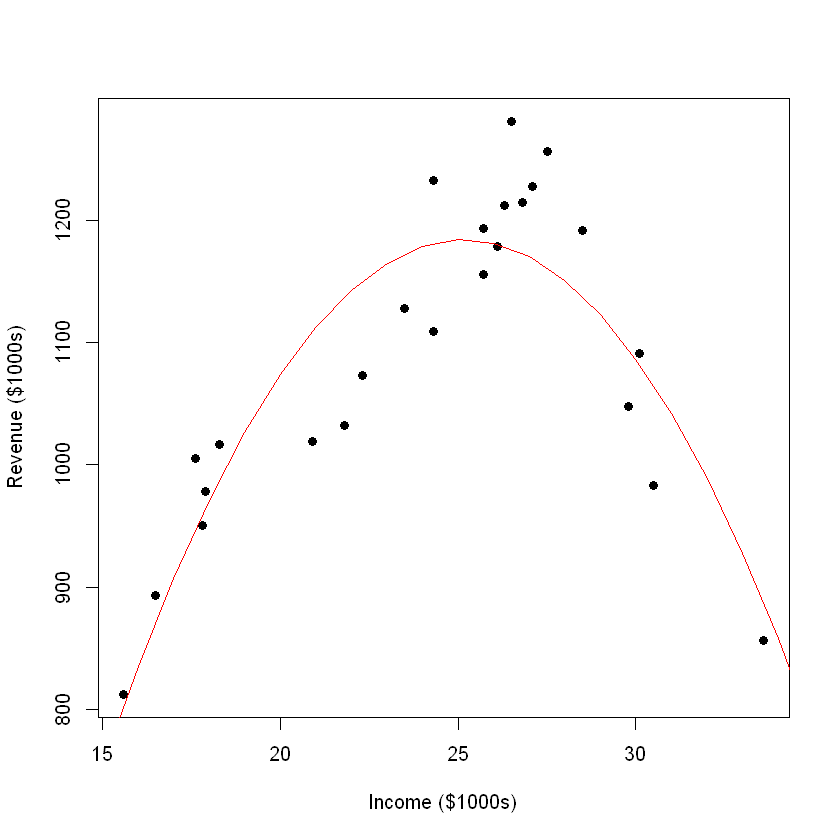

In [16]:
XvaluesQ <- seq(10, 35, 1) 
YpredictedQ <- linefit2$coefficients[3]*XvaluesQ^2 + linefit2$coefficients[2] * XvaluesQ + linefit2$coefficients[1] 
plot(Income, Revenue, pch = 16, xlab = "Income ($1000s)", ylab = "Revenue ($1000s)") 
lines(XvaluesQ, YpredictedQ, type = "l", col = "red")

In [17]:
# β1= 0 -> parabola symmetric around 0
# β1, β2 same sign -> shifts left
# β1, β2 opposite sign -> shifts right

# β2< 0 -> concave (inverted U-shape)
# β2> 0 -> convex (U-shape)
# Size of β2 -> steepness of curvature

In [18]:
library(plyr)

In [19]:
# R 8.2 Polishing

In [20]:
polish <- read_excel("Polishing.xlsx",  na="NA",  col_names = TRUE)


polish$typeF<-mapvalues(polish$type, c(1, 2, 3, 4, 5), c('bowl', 'cass', 'dish', 'tray', 'plate'))
polish$typeF<-factor(polish$typeF)
attach(polish)

In [21]:
head(polish)

Record,type,bowl,cass,dish,tray,diam,time,price,typeF
1,2,0,1,0,0,10.7,47.65,144,cass
2,2,0,1,0,0,14.0,63.13,215,cass
3,2,0,1,0,0,9.0,58.76,105,cass
4,1,1,0,0,0,8.0,34.88,69,bowl
5,3,0,0,1,0,10.0,55.53,134,dish
6,2,0,1,0,0,10.5,43.14,129,cass


In [22]:
typeF = mapvalues(typeF, c(1, 2, 3, 4, 5), c('bowl', 'cass', 'dish', 'tray', 'plate'))
#1=Bowl; 2=Casserole; 3=Dish; 4=Tray; 5=Plate

The following `from` values were not present in `x`: 1, 2, 3, 4, 5


In [23]:
typeF

[1] cass  cass  cass  bowl  dish  cass  tray  tray  dish  dish  tray  bowl 
[13] bowl  bowl  cass  cass  bowl  bowl  bowl  plate bowl  bowl  bowl  bowl 
[25] bowl  bowl  bowl  bowl  tray  bowl  dish  plate cass  dish  dish  bowl 
[37] cass  bowl  plate tray  tray  bowl  plate bowl  tray  tray  tray  bowl 
[49] tray  bowl  cass  cass  dish  bowl  plate plate plate plate plate
Levels: bowl cass dish plate tray

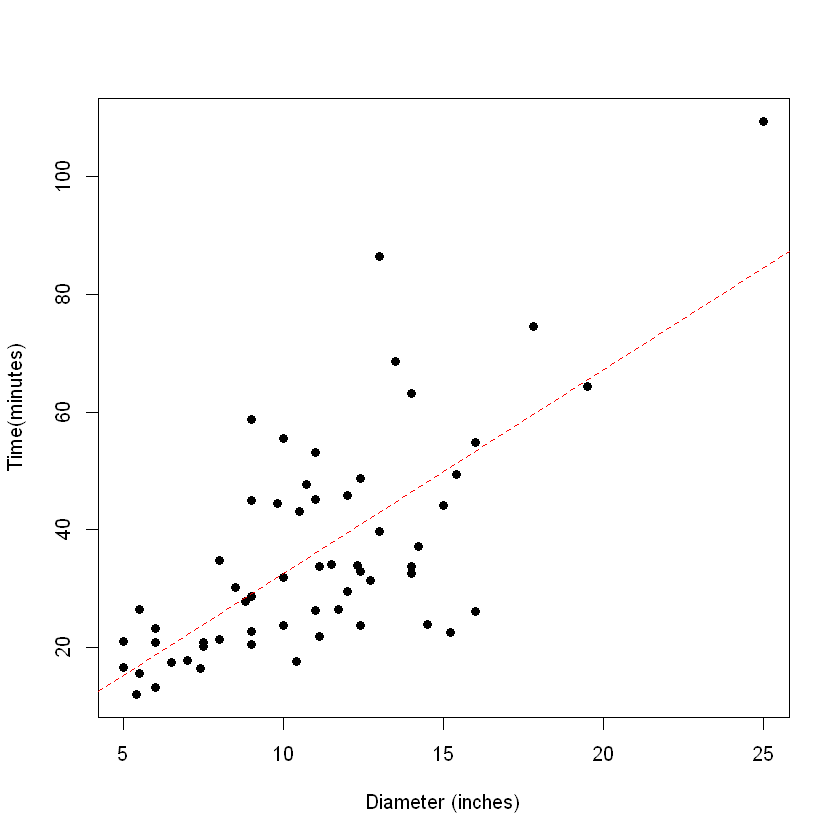

In [24]:
plot(diam, time, pch = 16 ,  xlab = "Diameter (inches)",  ylab = "Time(minutes)")
abline(lm(time ~ diam), lty=2,  col="red")

In [25]:
# a. Time = B0 + B1(diam) + B2(Type) + e
# ref = plate
# B2(bowl) + B3(dish) + B4(tray) + B5(plate)

# ref = bowl
# B2(cass) + B3(dish) + B4(tray) + B5(plate)

In [26]:
# Fit the simple linear regression model using diameter as the predictor of time

In [27]:
linefitH <- lm(time ~ diam)
summary(linefitH)


Call:
lm(formula = time ~ diam)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.037  -8.287  -2.705   8.315  43.438 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.9547     5.4020  -0.362    0.719    
diam          3.4567     0.4667   7.407 6.67e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.69 on 57 degrees of freedom
Multiple R-squared:  0.4905,	Adjusted R-squared:  0.4815 
F-statistic: 54.86 on 1 and 57 DF,  p-value: 6.67e-10


In [28]:
# Categorical - nominal - two predictor model with Diam & Type
# Residual standard error: 11.77 on 53 degrees of freedom
# Multiple R-squared:  0.6502,	Adjusted R-squared:  0.6172 
# F-statistic: 19.71 on 5 and 53 DF,  p-value: 4.828e-11

In [29]:
# Simple linear regression - diameter
# Residual standard error: 13.69 on 57 degrees of freedom
# Multiple R-squared:  0.4905,	Adjusted R-squared:  0.4815 
# F-statistic: 54.86 on 1 and 57 DF,  p-value: 6.67e-10

# ANOVA - time ~ type
# 0.374057863396754
# 15.5925779314002
# 3.56e-05

# diameter is better single predictor than type

# Predictors - k - R2 - S - Highest p-value
# Diam, Type - 5 - 0.65 - 11.8 - 4E-5(Type)
# Type(ANOVA) - 4 - 0.37 - 15.6 - 3.6E-5
# Diam - 1 - 0.49 - 13.7 - 6.7E-10

# Two predictor model wins

# (Income)^2

In [30]:
# d)Perform the ANOVA using type as a predictor of time

In [31]:
fitT <- aov(time ~ typeF)
summary(fitT)

            Df Sum Sq Mean Sq F value   Pr(>F)    
typeF        4   7846  1961.4   8.067 3.56e-05 ***
Residuals   54  13129   243.1                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [32]:
model.tables(fitT, "means")

Tables of means
Grand mean
         
35.81712 

 typeF 
     bowl  cass  dish plate tray
    27.12 53.26 35.01 24.19 49.4
rep 23.00 10.00  7.00  9.00 10.0

In [33]:
TukeyHSD(fitT, conf.level = .90)

  Tukey multiple comparisons of means
    90% family-wise confidence level

Fit: aov(formula = time ~ typeF)

$typeF
                 diff        lwr        upr     p adj
cass-bowl   26.132826  11.217775  41.047877 0.0004397
dish-bowl    7.887826  -9.109452  24.885104 0.7671569
plate-bowl  -2.927729 -18.409531  12.554072 0.9890860
tray-bowl   22.280826   7.365775  37.195877 0.0035580
dish-cass  -18.245000 -37.649708   1.159708 0.1381402
plate-cass -29.060556 -47.152582 -10.968529 0.0014642
tray-cass   -3.852000 -21.461486  13.757486 0.9811826
plate-dish -10.815556 -30.659198   9.028087 0.6451429
tray-dish   14.393000  -5.011708  33.797708 0.3439841
tray-plate  25.208556   7.116529  43.300582 0.0076063


In [34]:
# SSTreatment
anova(fitT)[["Sum Sq"]][1]

# SSError
anova(fitT)[["Sum Sq"]][2]

# R^2
(anova(fitT)[["Sum Sq"]][1])/((anova(fitT)[["Sum Sq"]][1])+(anova(fitT)[["Sum Sq"]][2]))

# sqrt(MSE)
sqrt(anova(fitT)[["Sum Sq"]][2]/fitT$df.residual)

[1] 7845.745

[1] 13128.94

[1] 0.3740579

[1] 15.59258

In [35]:
fitM <- aov(diam ~ typeF)
summary(fitM)

            Df Sum Sq Mean Sq F value  Pr(>F)   
typeF        4    217   54.25   4.549 0.00307 **
Residuals   54    644   11.93                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [36]:
# R^2
(anova(fitM)[["Sum Sq"]][1])/((anova(fitM)[["Sum Sq"]][1])+(anova(fitM)[["Sum Sq"]][2]))

[1] 0.2520349

In [37]:
linefitHT <- lm(time ~ diam + typeF)
summary(linefitHT)


Call:
lm(formula = time ~ diam + typeF)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.084  -6.949  -1.967   6.149  31.635 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.1880     5.0170  -0.237 0.813728    
diam          2.9992     0.4636   6.469 3.22e-08 ***
typeFcass    16.9825     4.6756   3.632 0.000634 ***
typeFdish     9.5477     5.0851   1.878 0.065949 .  
typeFplate   -7.1759     4.6722  -1.536 0.130520    
typeFtray     7.7619     4.9898   1.556 0.125763    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.77 on 53 degrees of freedom
Multiple R-squared:  0.6502,	Adjusted R-squared:  0.6172 
F-statistic: 19.71 on 5 and 53 DF,  p-value: 4.828e-11


In [38]:
polish2 <- polish
polish2 <- within(polish2, typeF <- relevel(typeF, ref = 2))
linefitHTalt <- lm(polish2$time ~ polish2$diam + polish2$typeF)
summary(linefitHTalt)


Call:
lm(formula = polish2$time ~ polish2$diam + polish2$typeF)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.084  -6.949  -1.967   6.149  31.635 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         15.7945     6.8830   2.295 0.025738 *  
polish2$diam         2.9992     0.4636   6.469 3.22e-08 ***
polish2$typeFbowl  -16.9825     4.6756  -3.632 0.000634 ***
polish2$typeFdish   -7.4349     6.0340  -1.232 0.223325    
polish2$typeFplate -24.1585     5.4586  -4.426 4.82e-05 ***
polish2$typeFtray   -9.2206     5.3266  -1.731 0.089262 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.77 on 53 degrees of freedom
Multiple R-squared:  0.6502,	Adjusted R-squared:  0.6172 
F-statistic: 19.71 on 5 and 53 DF,  p-value: 4.828e-11


In [39]:
polish2 <- polish
polish2 <- within(polish2, typeF <- relevel(typeF, ref = 5))
linefitHTalt <- lm(polish2$time ~ polish2$diam + polish2$typeF)
summary(linefitHTalt)


Call:
lm(formula = polish2$time ~ polish2$diam + polish2$typeF)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.084  -6.949  -1.967   6.149  31.635 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          6.5739     7.5945   0.866   0.3906    
polish2$diam         2.9992     0.4636   6.469 3.22e-08 ***
polish2$typeFbowl   -7.7619     4.9898  -1.556   0.1258    
polish2$typeFcass    9.2206     5.3266   1.731   0.0893 .  
polish2$typeFdish    1.7857     6.3144   0.283   0.7784    
polish2$typeFplate -14.9378     5.6341  -2.651   0.0106 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.77 on 53 degrees of freedom
Multiple R-squared:  0.6502,	Adjusted R-squared:  0.6172 
F-statistic: 19.71 on 5 and 53 DF,  p-value: 4.828e-11


In [40]:
# intercept - there is no plate that has zero diameter
# on average, a bowl takes 7.1759 minutes longer than plate

In [41]:
polish2 <- polish
polish2 <- within(polish2, typeF <- relevel(typeF, ref =1))
linefitHTalt <- lm(polish2$time ~ polish2$diam + polish2$typeF)
summary(linefitHTalt)


Call:
lm(formula = polish2$time ~ polish2$diam + polish2$typeF)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.084  -6.949  -1.967   6.149  31.635 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -1.1880     5.0170  -0.237 0.813728    
polish2$diam         2.9992     0.4636   6.469 3.22e-08 ***
polish2$typeFcass   16.9825     4.6756   3.632 0.000634 ***
polish2$typeFdish    9.5477     5.0851   1.878 0.065949 .  
polish2$typeFplate  -7.1759     4.6722  -1.536 0.130520    
polish2$typeFtray    7.7619     4.9898   1.556 0.125763    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.77 on 53 degrees of freedom
Multiple R-squared:  0.6502,	Adjusted R-squared:  0.6172 
F-statistic: 19.71 on 5 and 53 DF,  p-value: 4.828e-11


In [42]:
polish2 <- polish
polish2 <- within(polish2, typeF <- relevel(typeF, ref = 2))
linefitHTalt <- lm(polish2$time ~ polish2$diam + polish2$typeF)
summary(linefitHTalt)


Call:
lm(formula = polish2$time ~ polish2$diam + polish2$typeF)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.084  -6.949  -1.967   6.149  31.635 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         15.7945     6.8830   2.295 0.025738 *  
polish2$diam         2.9992     0.4636   6.469 3.22e-08 ***
polish2$typeFbowl  -16.9825     4.6756  -3.632 0.000634 ***
polish2$typeFdish   -7.4349     6.0340  -1.232 0.223325    
polish2$typeFplate -24.1585     5.4586  -4.426 4.82e-05 ***
polish2$typeFtray   -9.2206     5.3266  -1.731 0.089262 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.77 on 53 degrees of freedom
Multiple R-squared:  0.6502,	Adjusted R-squared:  0.6172 
F-statistic: 19.71 on 5 and 53 DF,  p-value: 4.828e-11


In [43]:
polish2 <- polish
polish2 <- within(polish2, typeF <- relevel(typeF, ref = 3))
linefitHTalt <- lm(polish2$time ~ polish2$diam + polish2$typeF)
summary(linefitHTalt)


Call:
lm(formula = polish2$time ~ polish2$diam + polish2$typeF)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.084  -6.949  -1.967   6.149  31.635 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          8.3596     6.0619   1.379  0.17367    
polish2$diam         2.9992     0.4636   6.469 3.22e-08 ***
polish2$typeFbowl   -9.5477     5.0851  -1.878  0.06595 .  
polish2$typeFcass    7.4349     6.0340   1.232  0.22332    
polish2$typeFplate -16.7236     5.9991  -2.788  0.00735 ** 
polish2$typeFtray   -1.7857     6.3144  -0.283  0.77843    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.77 on 53 degrees of freedom
Multiple R-squared:  0.6502,	Adjusted R-squared:  0.6172 
F-statistic: 19.71 on 5 and 53 DF,  p-value: 4.828e-11


In [44]:
polish2 <- polish
polish2 <- within(polish2, typeF <- relevel(typeF, ref = 4))
linefitHTalt <- lm(polish2$time ~ polish2$diam + polish2$typeF)
summary(linefitHTalt)


Call:
lm(formula = polish2$time ~ polish2$diam + polish2$typeF)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.084  -6.949  -1.967   6.149  31.635 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -8.3639     6.3805  -1.311  0.19556    
polish2$diam        2.9992     0.4636   6.469 3.22e-08 ***
polish2$typeFbowl   7.1759     4.6722   1.536  0.13052    
polish2$typeFcass  24.1585     5.4586   4.426 4.82e-05 ***
polish2$typeFdish  16.7236     5.9991   2.788  0.00735 ** 
polish2$typeFtray  14.9378     5.6341   2.651  0.01055 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.77 on 53 degrees of freedom
Multiple R-squared:  0.6502,	Adjusted R-squared:  0.6172 
F-statistic: 19.71 on 5 and 53 DF,  p-value: 4.828e-11


In [45]:
TukeyHSD(fitT, conf.level = .90)

  Tukey multiple comparisons of means
    90% family-wise confidence level

Fit: aov(formula = time ~ typeF)

$typeF
                 diff        lwr        upr     p adj
cass-bowl   26.132826  11.217775  41.047877 0.0004397
dish-bowl    7.887826  -9.109452  24.885104 0.7671569
plate-bowl  -2.927729 -18.409531  12.554072 0.9890860
tray-bowl   22.280826   7.365775  37.195877 0.0035580
dish-cass  -18.245000 -37.649708   1.159708 0.1381402
plate-cass -29.060556 -47.152582 -10.968529 0.0014642
tray-cass   -3.852000 -21.461486  13.757486 0.9811826
plate-dish -10.815556 -30.659198   9.028087 0.6451429
tray-dish   14.393000  -5.011708  33.797708 0.3439841
tray-plate  25.208556   7.116529  43.300582 0.0076063


In [46]:
polish <- within(polish, typeF <- relevel(typeF, ref = 'plate'))
linefitHT2 <- lm(polish$time ~ polish$diam * polish$typeF)
summary(linefitHT2)


Call:
lm(formula = polish$time ~ polish$diam * polish$typeF)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.453  -5.953  -2.592   5.009  32.862 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)   
(Intercept)                   17.41075   12.21709   1.425  0.16046   
polish$diam                    0.62491    1.07514   0.581  0.56375   
polish$typeFbowl             -10.62474   14.56155  -0.730  0.46908   
polish$typeFcass              28.41439   26.54669   1.070  0.28970   
polish$typeFdish             -22.84067   21.29184  -1.073  0.28864   
polish$typeFtray             -31.39773   15.55788  -2.018  0.04907 * 
polish$diam:polish$typeFbowl   1.52955    1.34287   1.139  0.26024   
polish$diam:polish$typeFcass  -0.03004    2.15439  -0.014  0.98893   
polish$diam:polish$typeFdish   3.92621    2.18973   1.793  0.07914 . 
polish$diam:polish$typeFtray   3.81417    1.24636   3.060  0.00358 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.

In [49]:
library(ggplot2)

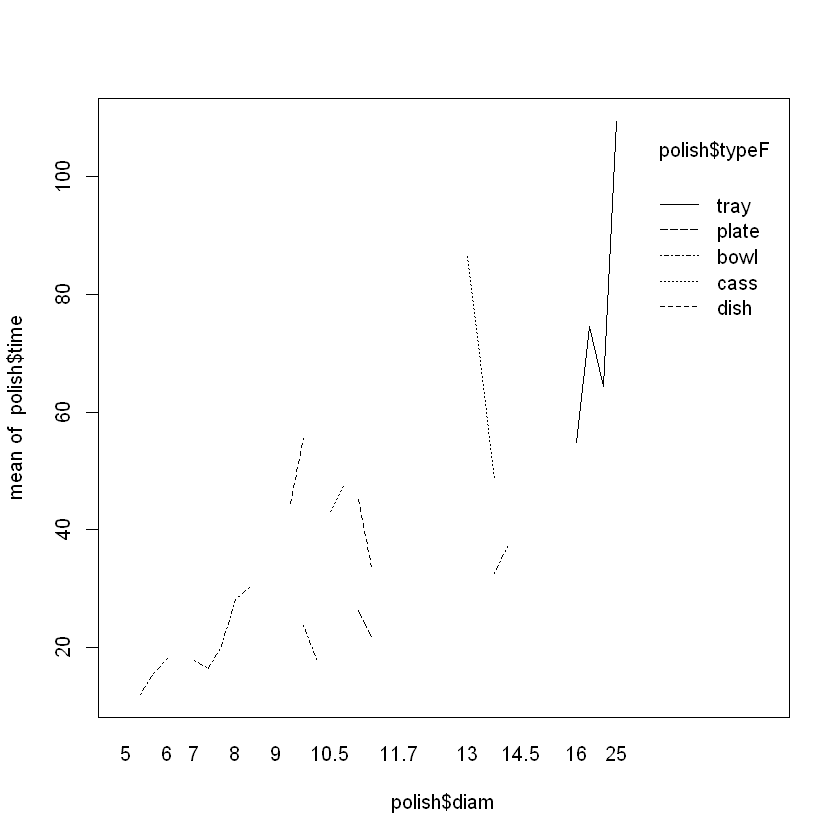

In [50]:
interaction.plot(polish$diam, polish$typeF, polish$time)

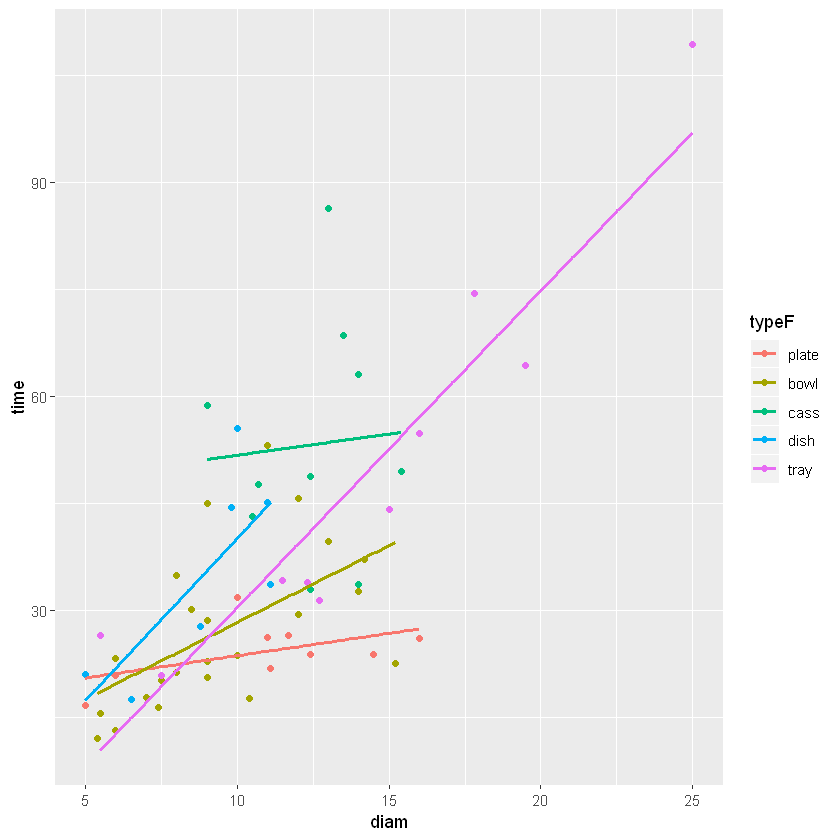

In [51]:
ggplot(polish, aes(x =diam, y=time, color = typeF)) +geom_point() +    geom_smooth(method = "lm",  se=F)

In [ ]:
# s = 10.83
# r^2 = 0.7258
# F(9, 49) = 14.41, p-value = 4.96e-11

In [ ]:
# H0: B1 = B2 = 0; no relationship with either predictor
# Ha: at least 1 non zero; at least one of them has a relationship

In [57]:
detach(polish)